In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import shutil
import random

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import hpy5

In [3]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

In [2]:
data_dir = '../input/adnimrilabeled/extracted-png-renamed-skull-stripped/train'
categories = ['AD','CN']

In [4]:
# for category in categories:
#     path = os.path.join(data_dir, category)
#     for img in os.listdir(path):
#         img_array = cv2.imread(os.path.join(path, img))
#         plt.imshow(img_array, cmap='gray')
#         plt.show()
#         break
#     break

In [5]:
img_size = 150

# new_array = cv2.resize(img_array, (img_size, img_size), cv2.IMREAD_GRAYSCALE)
# plt.imshow(new_array, cmap='gray')
# plt.show()

In [6]:
# for category in categories:
#         path = os.path.join(data_dir, category)
#         class_num = categories.index(category)
#         for img in tqdm(os.listdir(path)):
#             print (img)

In [7]:
#adopted from sentdex keras tutuorial
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
#             if int(img[-7:-4]) > 70 and int(img[-7:-4]) <100:
            
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()

100%|██████████| 9585/9585 [00:28<00:00, 337.69it/s]


In [9]:
print(len(training_data))

17679


In [10]:
random.shuffle(training_data)

In [11]:
# testing_data = []
# testing_dir = '../input/adnimrilabeled/extracted-png-renamed-skull-stripped/test'
# def create_testing_data():
#     for category in categories:
#         path = os.path.join(testing_dir, category)
#         class_num = categories.index(category)
#         for img in tqdm(os.listdir(path)):
# #             if int(img[-7:-4]) > 70 and int(img[-7:-4]) <100:
            
#             img_array = cv2.imread(os.path.join(path, img))
#             new_array = cv2.resize(img_array, (img_size, img_size))
#             testing_data.append([new_array, class_num])
            

In [12]:
# create_testing_data()

In [13]:
# len(testing_data)

2982

In [13]:
# random.shuffle(testing_data)

In [14]:
for sample in training_data[:5]:
    print(sample[1])

0
1
0
0
1


In [15]:
X = []
y = []

In [16]:
for features, label in training_data[:9000]:
    X.append(features)
    y.append(label)
    
X = (np.array(X).reshape(-1, img_size, img_size, 3))/255

In [17]:
X.shape

(9000, 150, 150, 3)

In [18]:
y = np.array(y)

In [19]:
y.shape

(9000,)

In [20]:
vgg_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 3s 0us/step


In [21]:
for layers in (vgg_model.layers):
    layers.trainable = False

In [22]:
model = Sequential()

In [23]:
for layer in vgg_model.layers:

    model.add(layer)
    
        

In [24]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [26]:
model.compile(Adam(lr=0.0001), loss='binary_crossentropy', 
              metrics=['accuracy'])


In [27]:
# model.compile(optimizer='adam',
#               loss='binary_crossentropy', metrics=['accuracy', 'mse', 'Precision', 'Recall'])

In [28]:
history = model.fit(X, y, batch_size=100, epochs = 40, validation_split=0.2)

Epoch 1/40
72/72 [==============================] - 11s 146ms/step - loss: 0.6653 - accuracy: 0.5943 - val_loss: 0.6354 - val_accuracy: 0.6289
Epoch 2/40
72/72 [==============================] - 10s 133ms/step - loss: 0.6129 - accuracy: 0.6682 - val_loss: 0.5969 - val_accuracy: 0.6911
Epoch 3/40
72/72 [==============================] - 9s 131ms/step - loss: 0.5711 - accuracy: 0.7079 - val_loss: 0.5720 - val_accuracy: 0.7133
Epoch 4/40
72/72 [==============================] - 10s 132ms/step - loss: 0.5486 - accuracy: 0.7261 - val_loss: 0.5560 - val_accuracy: 0.7150
Epoch 5/40
72/72 [==============================] - 10s 132ms/step - loss: 0.5266 - accuracy: 0.7386 - val_loss: 0.5530 - val_accuracy: 0.7178
Epoch 6/40
72/72 [==============================] - 9s 132ms/step - loss: 0.5174 - accuracy: 0.7432 - val_loss: 0.5406 - val_accuracy: 0.7256
Epoch 7/40
72/72 [==============================] - 10s 134ms/step - loss: 0.4998 - accuracy: 0.7563 - val_loss: 0.5324 - val_accuracy: 0.7389
E

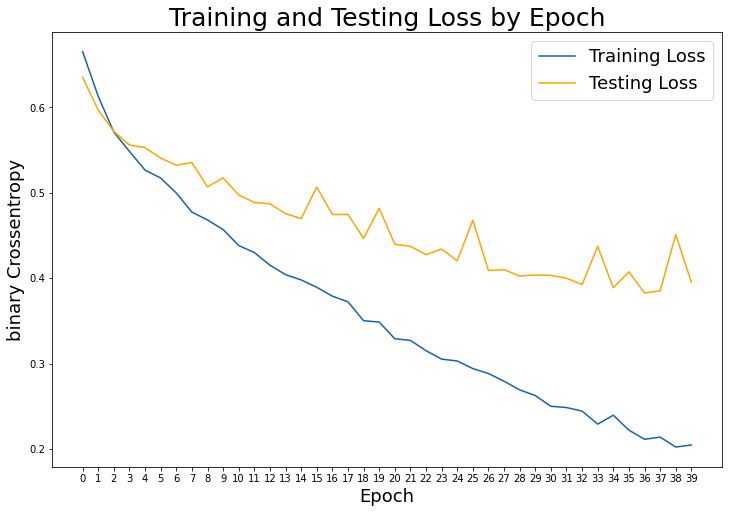

In [30]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('binary Crossentropy', fontsize = 18)
plt.xticks(np.arange(40), np.arange(40))

plt.legend(fontsize = 18);

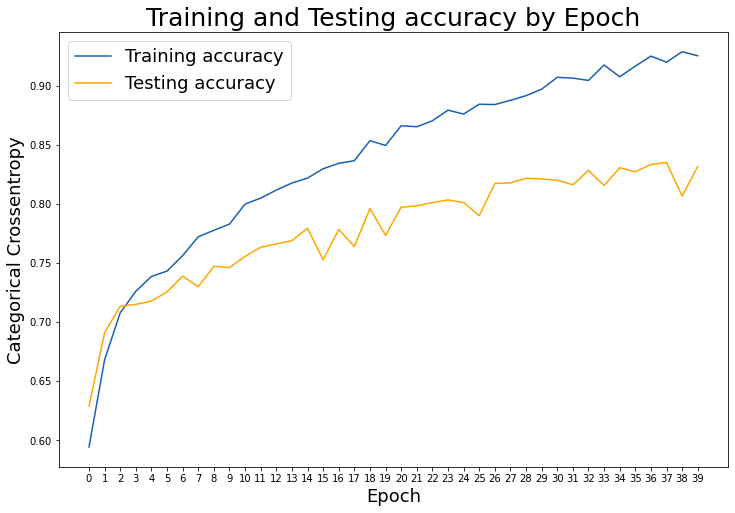

In [31]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training accuracy', color='#185fad')
plt.plot(test_acc, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(40), np.arange(40))

plt.legend(fontsize = 18);